In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from imblearn.under_sampling import RandomUnderSampler

In [16]:
data = pd.read_csv('Social_Network_Ads.csv')

In [17]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [18]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
data.duplicated().sum()

np.int64(33)

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              367 non-null    int64
 1   EstimatedSalary  367 non-null    int64
 2   Purchased        367 non-null    int64
dtypes: int64(3)
memory usage: 11.5 KB


In [22]:
data.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Data Spliting

In [23]:
x = data.drop(columns=['Purchased'])
y = data['Purchased']

In [24]:
y.value_counts()

Purchased
0    229
1    138
Name: count, dtype: int64

# Balancing Data

In [25]:
model = RandomUnderSampler()
x ,y = model.fit_resample(x,y)

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)


# GridsearchCV Logistic

In [27]:
model = LogisticRegression()

In [28]:
param = {
    'C': [1],
    'max_iter':[100],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'n_jobs' : [1,2,3,4,5,6]
}

In [29]:
grid = GridSearchCV(estimator=model,param_grid=param,cv=5)
grid.fit(X_train,Y_train)

c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\scipy\optimize\_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\sklearn\utils\optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\scipy\optimize\_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\sklearn\utils\optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\scipy\optimize\_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1], 'max_iter': [100],
                         'n_jobs': [1, 2, 3, 4, 5, 6],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [30]:
best_param = grid.best_params_


In [31]:
best_param

{'C': 1, 'max_iter': 100, 'n_jobs': 1, 'solver': 'lbfgs'}

# Train Model

In [32]:
model = LogisticRegression(random_state=42,**best_param)
model.fit(X_train,Y_train)

LogisticRegression(C=1, n_jobs=1, random_state=42)

# Model Evelution

In [33]:
Y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(Y_test,Y_pred)*100
accuracy

87.5

In [51]:
score = classification_report(Y_test,Y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.92      0.82      0.87        28

    accuracy                           0.88        56
   macro avg       0.88      0.88      0.87        56
weighted avg       0.88      0.88      0.87        56



In [41]:
confusion = confusion_matrix(Y_test,Y_pred)
confusion

array([[26,  2],
       [ 5, 23]])

# Visualization

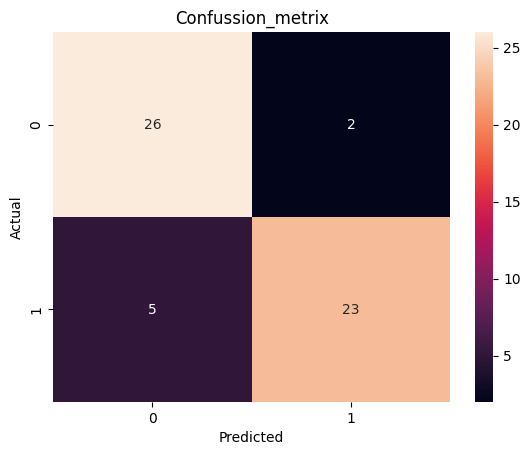

In [52]:
sns.heatmap(confusion,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion_metrix')
plt.show()